In [1]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_dataframe(matrix, save_xlsx=False):
    with open(f"raw_data/matrix_{matrix}/{matrix}.bmerawdata") as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    if save_xlsx:
        df.to_excel(f"raw_data/matrix_{matrix}/{matrix}.xlsx")

    return df

In [47]:
# df = get_dataframe(1, save_xlsx=True)

In [3]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [4]:
def build_raw_data_pickle(save_pickle=False):
    sensor_data = {}
    for matrix in range(2):
        df = get_dataframe(matrix)
        sensor_data[f"mat_{matrix}"] = build_sensor_data(df)

    if save_pickle:
        with open("raw_sensor_data.pkl", "wb") as f:
            pickle.dump(sensor_data, f)

    return sensor_data

In [5]:
sensor_data = build_raw_data_pickle(save_pickle=False)

In [9]:
sensor_data["mat_0"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
0,0,355892538,7587,1728722960,23.795422,920.919189,54.892307,1.305456e+05,0,1,1,0,0,2024-10-12 11:49:20
44,0,355892538,18401,1728722970,26.429729,920.986938,47.010006,4.069952e+05,0,1,1,0,0,2024-10-12 11:49:30
94,0,355892538,29308,1728722981,27.381306,920.964050,43.502491,5.863155e+05,0,1,1,0,0,2024-10-12 11:49:41
142,0,355892538,40013,1728722992,27.919703,920.951050,41.603043,7.361611e+05,0,1,1,0,0,2024-10-12 11:49:52
194,0,355892538,50890,1728723003,28.385479,920.945312,40.335224,8.789699e+05,0,1,1,0,0,2024-10-12 11:50:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111946,0,355892538,25110945,1728748066,37.844292,921.096863,28.867994,8.260146e+06,0,1,1,0,0,2024-10-12 18:47:46
111998,0,355892538,25121683,1728748077,37.671486,921.131226,29.160694,8.285208e+06,0,1,1,0,0,2024-10-12 18:47:57
112045,0,355892538,25132515,1728748088,37.939461,921.089844,29.089491,8.204306e+06,0,1,1,0,0,2024-10-12 18:48:08
112095,0,355892538,25143347,1728748099,37.979530,921.079834,29.020199,8.229030e+06,0,1,1,0,0,2024-10-12 18:48:19


In [38]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(8, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"mat_{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

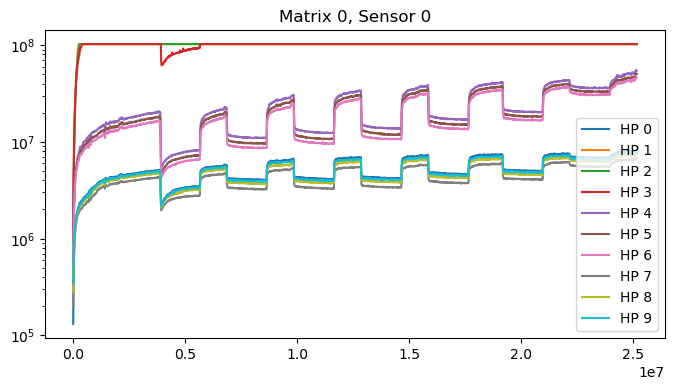

In [42]:
plot_sensor(0, 0, sensor_data)